# Logistic Regression

### Problem With Linear Regression (Case Study)
- Let us say we want to find the relationship between Virat Kohli's score and India winning the match. There are two outputs for result variable, either India will win the match or India will lose the match. Now let us say we want to find whether India wins the match if Virat Kohli scores above 50.
- Can we solve the problem using Linear Regression?
- As we can see there are two outputs 0 or 1 and no other value in between, we cannot use linear regression in such conditions. Here we are not predicting a numnerical value instedad we are trying to predict one out of the two outcomes 0,1 - WIN,Lose - Yes,No. In such cases where we have to classify we use Logistic Regression.
  <img src = 'https://blog.datasciencedojo.com/content/images/2019/11/logistic-regression-tutorial-1.png'>
  

We use Logistic Regression to fit a sigmoid curve, it is an S - shaped line, which tells us the winning probabilty on the basis of another variable X. So Basically we are trying to find out the probability of an event occuring on the basis of another variable.

**NOTE:** In Logistic Regression the dependent variable has to be categorical in nature.


**EXAMPLE :** Suppose we want to find the relationship between smoking and cancer. Our aim is to find whether a person has cancer or not on the basis of whether he smokes or not. Here, the dependent variable is categorical in nature that is either he/she is a smoker or not.

**SIGMOID FUNCTION** : $f(x) = e^x/1+e^x$



### IMPLEMENTATION

In [59]:
#IMPORTING NECESSARY LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

In [60]:
#READING THE DATASET FROM URL

url = "https://raw.githubusercontent.com/Statology/Python-Guides/main/default.csv"
df = pd.read_csv(url)
df.head()

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


In [61]:
#PRINTING THE SHAPE AND STATISTICS

print(df.shape)
print(df.describe())

(10000, 4)
            default       student       balance        income
count  10000.000000  10000.000000  10000.000000  10000.000000
mean       0.033300      0.294400    835.374886  33516.981876
std        0.179428      0.455795    483.714985  13336.639563
min        0.000000      0.000000      0.000000    771.967729
25%        0.000000      0.000000    481.731105  21340.462903
50%        0.000000      0.000000    823.636973  34552.644802
75%        0.000000      1.000000   1166.308386  43807.729272
max        1.000000      1.000000   2654.322576  73554.233495


In [62]:
df.isnull().sum()

### UNIVARIATE ANALYSIS

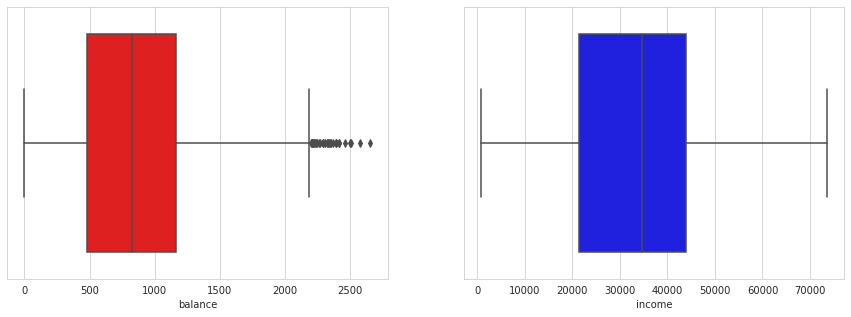

In [63]:
#BOXPLOT OF BALANCE,INCOME COLUMNS

sns.set_style('whitegrid')
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(df.balance,color='red')

plt.subplot(1,2,2)
sns.boxplot(df.income, color = 'blue')
plt.show()

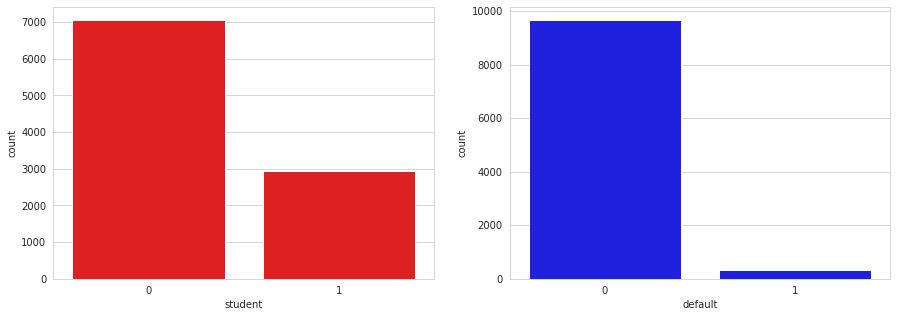

In [64]:
#COUNTPLOT OF BALANCE,INCOME COLUMNS

sns.set_style('whitegrid')
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(df.student,color='red')

plt.subplot(1,2,2)
sns.countplot(df.default, color = 'blue')
plt.show()

From the above countplot we can say that around 70000 are non students and rest are non students, also most people tend to clear the default.

In [65]:
df['student'].value_counts()

In [66]:
df['default'].value_counts()

### BIVARIATE ANALYSIS

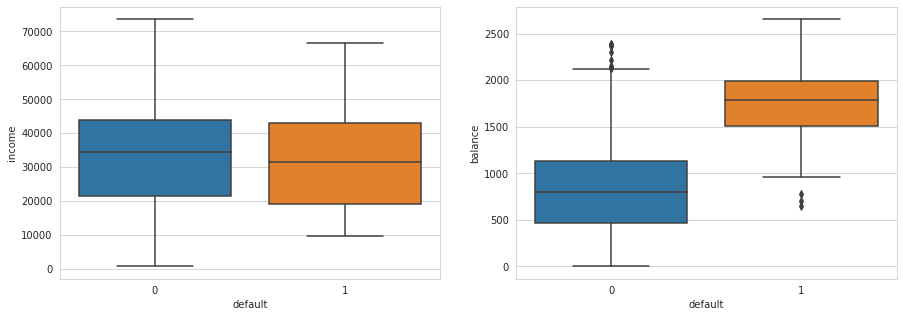

In [67]:

sns.set_style('whitegrid')
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(df['default'],df['income'])

plt.subplot(1,2,2)
sns.boxplot(df['default'],df['balance'])
plt.show()

From the above boxplots we can say that, those who clear their defaults tend to have lower balance than the people who have higher balance. 

In [97]:
pd.crosstab(df['student'],df['default'],normalize= 'index').round(2)

default,0,1
student,,
0,0.97,0.03
1,0.96,0.04


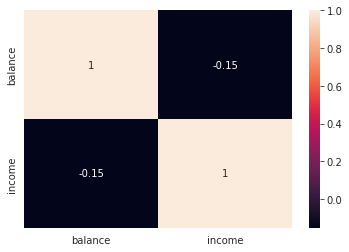

In [69]:
sns.heatmap(df[['balance','income']].corr(),annot = True)

No relation between income and balance 

**NOTE :** We need to remove outliers whenever a model is to be built.

So, lets analyse the outliers and find which values are to be called outliers.

In [70]:
#CALCULATING FIRST AND THIRD QUARTILES

Q1,Q3 = df['balance'].quantile([.25,.75])
IQR = Q3 - Q1
LL = Q1 - (1.5*IQR)
UL = Q3 + (1.5*IQR)

In [71]:
print("LL:",LL)
print("Q1:",Q1)
print("Q3:",Q3)
print("UL:",UL)

LL: -545.1348170774612
Q1: 481.731105054518
Q3: 1166.3083864758376
UL: 2193.174308607817


Therefore all the values over 2193 are outliers.

In [98]:
outliers_df = df[df['balance'] > 2193]
outliers_df.head()

,default,student,balance,income
173,1,1,2193.174309,14271.492253
1136,1,0,2193.174309,51504.293960
1160,1,1,2193.174309,14947.519752
1359,1,0,2193.174309,40725.096207
1502,1,1,2193.174309,11770.234124


In [99]:
outliers_df['default'].count()

31

Out of 10,000 observations there are 31 observations which are outliers.

In [100]:
outliers_df['default'].value_counts(normalize=True).round(2)

Therefore, For outliers most of the candidates are defaulters. 

In [101]:
outliers_df['default'].value_counts()

Out of 31, 26 are defaulters. But in our original data set there are only 303 defaulters.

For outliers we are changing the balance and setting it equal to the upper limit which is 2193.

In [76]:
df['balance'] = np.where(df['balance'] > UL, UL, df['balance'])

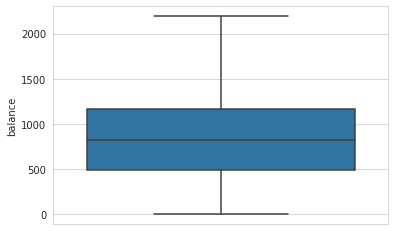

In [77]:
sns.boxplot(y=df['balance'])

As we can see we have successfully removed the outliers from our data set

In [102]:
df.head()

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X = df.drop('default',axis=1) #Except default all three columns are selected
y = df.default 

In [81]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=21,stratify=y) #--> Stratify is yes because the number of defaulters in training set will be equal to the number of defaulters in train set.

In [82]:
print(X_train.shape)
print(X_test.shape)

(7000, 3)
(3000, 3)


In [83]:
print(y_train.value_counts(normalize=True).round(2))
print(y_test.value_counts(normalize=True).round(2))

0    0.97
1    0.03
Name: default, dtype: float64
0    0.97
1    0.03
Name: default, dtype: float64


We have stratified the datasets that is number of defaulters in training and testing datasests remain same.

In [84]:
!pip install imblearn

In [85]:
#from imblearn.over_sampling import SMOTE
#sm = SMOTE(random_state = 33,sampling_strategy = 0.75)
#X_res,y_res = sm.fit_sample(X_train,y_train)

AttributeError: AttributeError: 'SMOTE' object has no attribute 'fit_sample'

In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
lr = LogisticRegression()

In [88]:
lr.fit(X_train,y_train)

LogisticRegression()

In [89]:
y_pred = lr.predict(X_test)

In [90]:
from sklearn.metrics import confusion_matrix,classification_report

In [91]:
confusion_matrix(y_test,y_pred)

In [96]:
print("The accuracy of our model is :", (2889+34)/(2889+34+66+11)*100,"%")

The accuracy of our model is : 97.43333333333334 %
